# Part I - Loan Data Exploration
## by Kimberly Gatti

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


> Below I'm going to do minimal cleaning of the data for different parts of the project in the later sections.

In [4]:
#Later in the project, I want to use the Loan Status column. This column as a number of Past Due columns by different lengths of time. I've combined them into one category.
#make a copy of the column
df['LoanStatus_new']=df['LoanStatus']

#change the values containing Past Due to past due
mask=df['LoanStatus_new'].str.contains("Past Due")
df.loc[mask,'LoanStatus_new']="Past Due"

In [5]:
ordinal_var_dict = {'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','nan'],
                   'LoanStatus_new': ['Current','Completed','FinalPaymentInProgress','Past Due','Chargedoff','Defaulted']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [6]:
#get rid of the spaces in some of the column names
df.columns = [c.replace(' ', '_') for c in df.columns]

>Now to start the exploration and investigate what the dataset is about. 

In [7]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(85665, 82)
ListingKey                               object
ListingNumber                             int64
ListingCreationDate                      object
CreditGrade                              object
Term                                      int64
LoanStatus                               object
ClosedDate                               object
BorrowerAPR                             float64
BorrowerRate                            float64
LenderYield                             float64
EstimatedEffectiveYield                 float64
EstimatedLoss                           float64
EstimatedReturn                         float64
ProsperRating_(numeric)                 float64
ProsperRating_(Alpha)                    object
ProsperScore                            float64
ListingCategory_(numeric)               float64
BorrowerState                            object
Occupation                               object
EmploymentStatus                         object
EmploymentStatusDuration    

In [8]:
df.BorrowerRate.describe()

count    85665.000000
mean         0.192524
std          0.074836
min          0.000000
25%          0.133400
50%          0.183000
75%          0.250000
max          0.497500
Name: BorrowerRate, dtype: float64

In [9]:
df.LoanStatus.value_counts()

Current                   42575
Completed                 28650
Chargedoff                 8982
Defaulted                  3750
Past Due (1-15 days)        607
Past Due (31-60 days)       268
Past Due (61-90 days)       232
Past Due (91-120 days)      220
Past Due (16-30 days)       201
FinalPaymentInProgress      163
Past Due (>120 days)         14
Cancelled                     3
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> There are 85,665 detailed loans in this dataset and 81 columns. That is alot of columns! Many are numeric but some are categorical, like Loan Status, Borrower State, Listing Category, Occupation, and Employment status. The columns break down into two parts, Borrower information and Loan information

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in exploring if there are any key indicators that affect the interest rate of a loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are so many records that appear to have been collected that narrowing it down to just a few will be necessary.  I assume that the income range will affect the interest rate. I would also assume that the relationship between previous delinquencies, on-time payments, and credit score will have a high correlation to the resulting interest rate. I'm curious about the effect of Listing Category and whether something so important yet optional as adoption for example would lend itself to a higher interest rate. An added curiosity would be to decide whether the higher the interest rate, the higher the default rate.  

## Univariate Exploration

> Let's start with looking at the main variable of curiousity: interest rate 


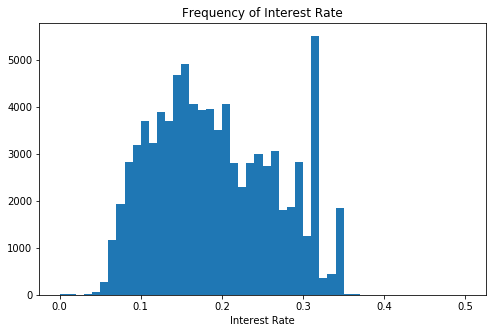

In [11]:
# start with a standard-scaled plot of Interest rate
binsize = .01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate',bins=bins)
plt.xlabel('Interest Rate')
plt.title('Frequency of Interest Rate')
plt.show()

>The feature that stands out the most is the spike around 0.32. This curve has two modes but I expected something more of a normal curve. There is certainly some outliers to the right of the data and the range being 0.5 and the Q4 covering .25 of that indicates that we are skewed right. 

>Let's look at the first factor to consider with interest rates: Income

Text(0.5,1,'Frequency of Income Ranges')

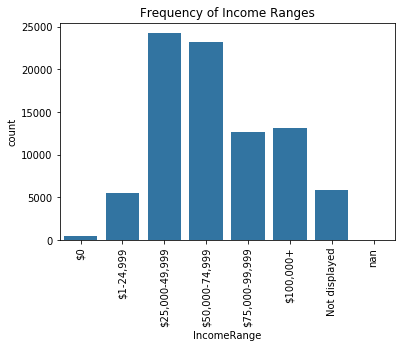

In [13]:
#plot of income range

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeRange',color = default_color);
plt.xticks(rotation=90);
plt.title('Frequency of Income Ranges');

>The distribution is skewed slightly to the right as well. 

>Let's next look at deliquencies. First, the deliquencies in the last 7 years

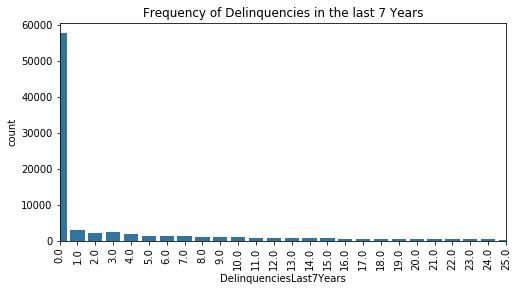

In [73]:
#Plot of deliquencies in the last 7 years

plt.figure(figsize=(8,4))
sb.countplot(data = df, x = 'DelinquenciesLast7Years',color = default_color);
plt.xticks(rotation=90);
plt.xlim([0, 25])
plt.title('Frequency of Delinquencies in the last 7 Years');



>Because of how the trend continues out to about 100, I decided to just see the first 25 delinquencies so the graph was easier to read. 
>Obviously there is a significant amount of data with 0 delinquencies.

>It didn't expect such a large count at 0
>I can see the trend is decreasing as expected.
>Next we can look at On Time Prosper Payments

>I'm interested in this to see if there is any correlation between interest rate and on time payments after the loan is made.
 

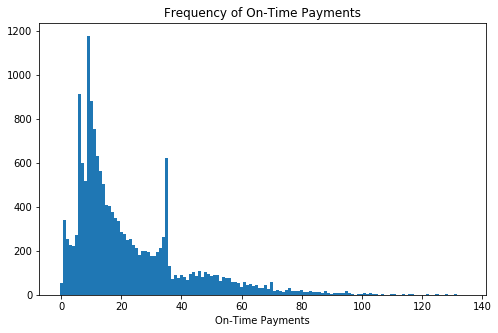

In [24]:
#Graph of on time payments
plt.figure(figsize=[8, 5])

categories = df['OnTimeProsperPayments'].value_counts().index
counts = df['OnTimeProsperPayments'].value_counts().values
plt.bar(categories, counts, width=1)
plt.title('Frequency of On-Time Payments');
plt.xlabel('On-Time Payments');

>I didn't expect this to drop off so quickly with ontime payments.I'm assuming the spike at 10 and 36 are due to the terminating of a loan interval but I would have expected another spike at 60. 

>Let's explore that by look at loan term

Text(0.5,0,'Term Loan')

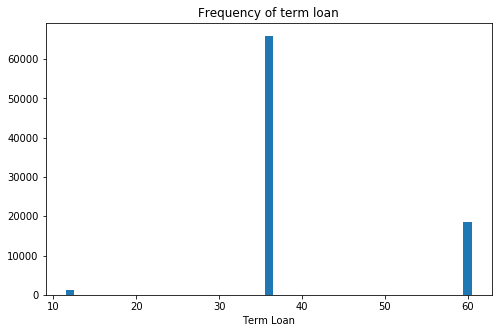

In [25]:
#Graph of term loan
plt.figure(figsize=[8, 5])

categories = df['Term'].value_counts().index
counts = df['Term'].value_counts().values
plt.bar(categories, counts, width=1)

plt.title('Frequency of term loan');
plt.xlabel('Term Loan')

>Yes, the spikes in the spikes of on-time-payments correspond to the terms set on the loans:12,36,and 60

>Next, let's look at the credit score. I'm using the upper limit information.

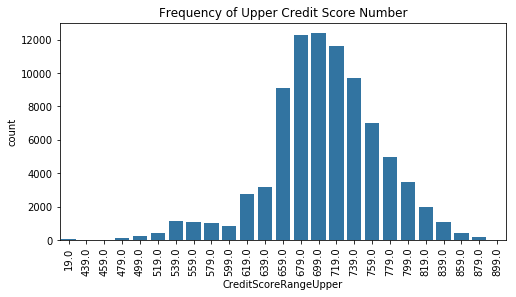

In [20]:
#credit score Upper limit.  
plt.figure(figsize=(8,4))
sb.countplot(data = df, x = 'CreditScoreRangeUpper',color = default_color);
plt.xticks(rotation=90);
plt.title('Frequency of Upper Credit Score Number');


>I just as easily could use the lower credit score which appears to be about the same as you can see below.

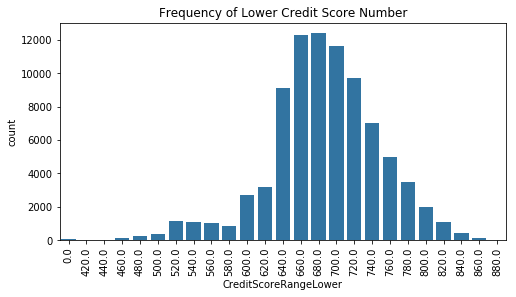

In [21]:
 #Credit score lower limit
plt.figure(figsize=(8,4))
sb.countplot(data = df, x = 'CreditScoreRangeLower',color = default_color);
plt.xticks(rotation=90);
plt.title('Frequency of Lower Credit Score Number');

>This is interesting that this a normal distribution when the actual Interest rate offered had a spike. 

>Now let's look at whether there is anything interesting about the listing category.

>The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

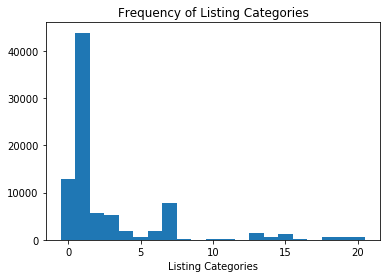

In [27]:
#Listing Category 

categories = df['ListingCategory_(numeric)'].value_counts().index
counts = df['ListingCategory_(numeric)'].value_counts().values
plt.bar(categories, counts, width=1)
plt.title('Frequency of Listing Categories');
plt.xlabel('Listing Categories');




>I expected these to be somewhat randomly distributed with a few taking most of the data. 
>#1 corresponds to debt consolidation, the other spike at 7 corresponds to "other"

>Now let's look at loan amount.

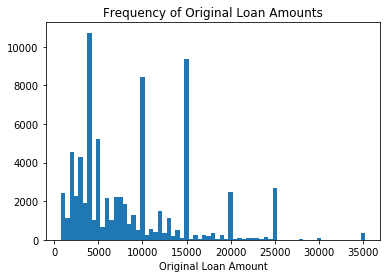

In [29]:
#Loan Amount: 

categories = df['LoanOriginalAmount'].value_counts().index
counts = df['LoanOriginalAmount'].value_counts().values
plt.bar(categories, counts, width=500)
plt.xlabel('Original Loan Amount');
plt.title('Frequency of Original Loan Amounts');

>It definitely makes sense that the spikes are happening at multiples of $5000
>We can dive in a bit deeper. 

In [30]:
#explore the above graph further
df.LoanOriginalAmount.describe()

count    85664.000000
mean      8338.683344
std       6240.574963
min       1000.000000
25%       4000.000000
50%       6500.000000
75%      12000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

>Original Loan amount: spikes at the multiples of $5000, median value $6500, Mean $8338 Q3-$12000
>Loans are generally smaller than I was thinking when I started this data project. I was thinking there would be house loans and car loans for big amounts.Looking at the category graph earlier, I realize I just had the wrong impression


>Next I want to look at loan status. I'm using the column I created at the beginning of the project without the information of default by length of time. 

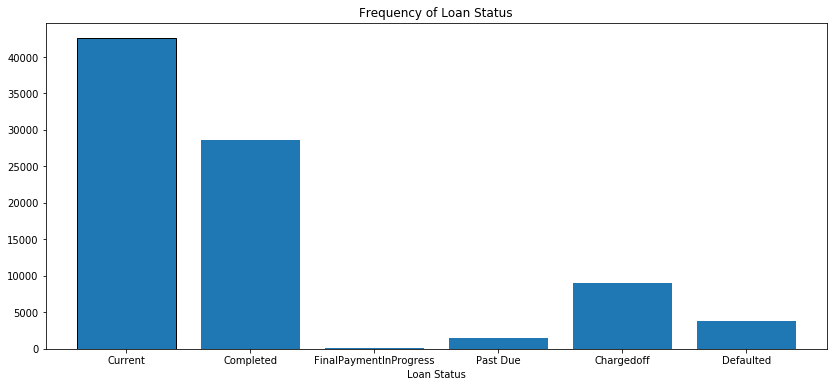

In [32]:
#Graph of Loan Status with the altered column of Loan Status
df['LoanStatus_new'].value_counts().sort_index().plot.bar(color = default_color,edgecolor='black',figsize=[14,6],rot=0,width=0.8);
plt.xlabel('Loan Status');
plt.title('Frequency of Loan Status');

>The majority of loans are either current of completed. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Interest Rate:skewed right with a spike at 3.2

>Income range: skewed right

>Delinquencies in the last 7 years: huge intial value then decreasing.  Needed to do a log transformation of the y-axis

>On time Payments:skewed right with a few spikes. Corresponds with the amount of the loans

>Credit Score Range Upper:normal distribution

>Listing Category: Relatively random

>Original Loan amount: spikes at the multiples of $5000, median value $6500, Mean $8338 Q3-$12000

>Loan status:Highest is the current and then the completed status



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>I didn't expect the spikes in the loan amounts graph but of course it makes sense now that I think about it.Same with the on-time payment spikes at the 12,36,and 60 values. I really didn't anticipate the spike in the interest rate graph and still don't know why there is that spike. Hopefully my investigation might bring clarity.

> One wrangling adjustment was that I had to eliminate the spaces in columns to get the Listing Categories to graph. I replaced them with underscores so that the code would be able to read it. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [33]:
#create shortcuts for the columns I want to investigate quickly together
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'LoanOriginalAmount']
categoric_vars = ['IncomeRange', 'DelinquenciesLast7Years', 'OnTimeProsperPayments','ListingCategory_(numeric)','LoanStatus']

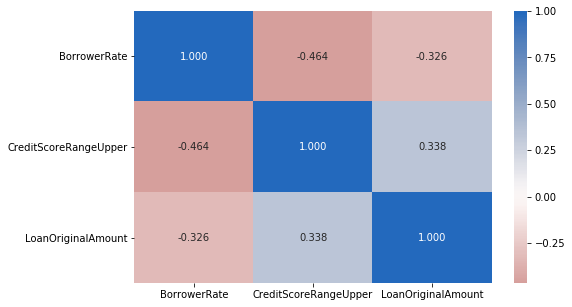

In [34]:
# correlation plot of numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>Looks like the relationship between Interest Rate and Credit Score might be interesting to look at more closely

>I want to get a quick look at the plots as well. 


In [38]:
#drop na values
cols=['BorrowerRate','CreditScoreRangeUpper','LoanOriginalAmount']

pg_data=df.dropna(subset=cols).copy()

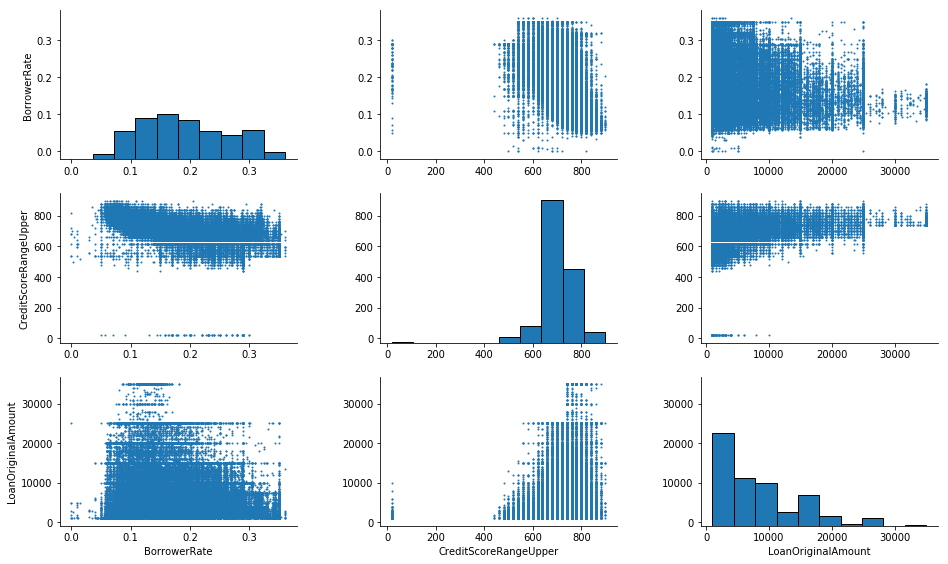

In [39]:
#Scatter Plot grid of numerical data
g = sb.PairGrid(data = pg_data, vars = cols)
g.map_diag(plt.hist,edgecolor='black')
g.map_offdiag(plt.scatter,s=1);

g.fig.set_size_inches(14,8);




There appears to be a relationship that I didn't think about which is between the Credit Score and the amount of the loan given. Also the higher the loan value, the lower the interest rate. We expected this from the above heatmap.



>Now we get to look at the variables we observed in the first part and look at their relationship with the Interest Rate and a few other. We will start with the Credit Score vs. Interest Rate

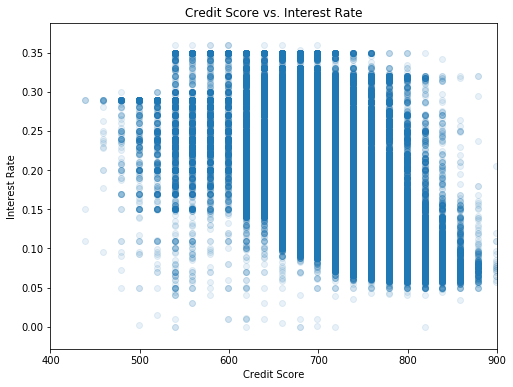

In [43]:
#scatter of BorrowerRate vs. CreditScoreRangeUpper
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate',alpha = 1/10)
plt.xlim([400, 900])
plt.xlabel('Credit Score')

plt.ylabel('Interest Rate')
plt.title('Credit Score vs. Interest Rate');
plt.show()


>Given the faded nature in the lower left and the upper right, as well as the dark trend towards the lower right corner, there seems to be a correlation between credit score and interest rate. 

>Now we look at the Original Loan Amount vs. Interest Rate

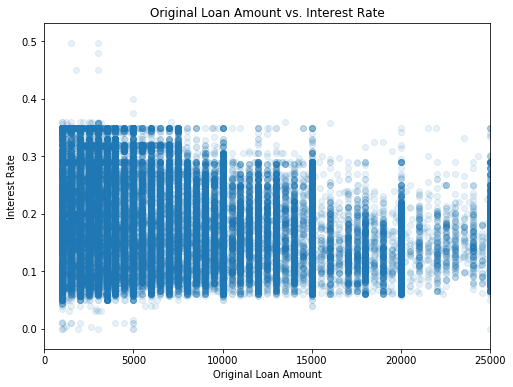

In [46]:
#Borrower Rate vs. Loan original amount 

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate',alpha = 1/10)
plt.xlim([0, 25000])
plt.xlabel('Original Loan Amount')
plt.title('Original Loan Amount vs. Interest Rate');

plt.ylabel('Interest Rate')
plt.show()

>With larger loans, the interest rates are tending to be lower. 

>Now the Listing Categories to see if there is any influence on interest rate. 

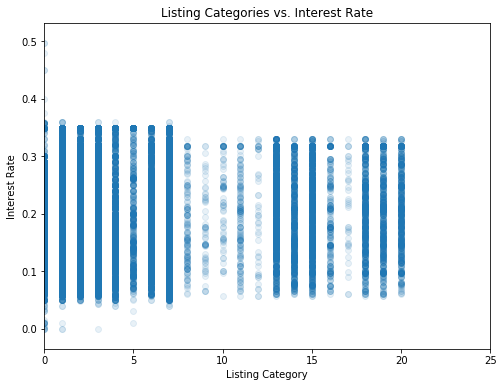

In [47]:
#Borrower Rate vs. Listing Categories
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'ListingCategory_(numeric)', y = 'BorrowerRate',alpha = 1/10)
plt.xlim([0, 25])
plt.xlabel('Listing Category')
plt.title('Listing Categories vs. Interest Rate');

plt.ylabel('Interest Rate')
plt.show()




>I was very curious to see whether there would be a category that would have only high interest rates. I had expected column 8-adoption would be one of these. It would look darker at the top vs the bottom of these columns. I'm not seeing that. It looks like category 9,10,12, and 17 are the lightest indicating the least frequent. This corresponds with 9 - Boat, 10 - Cosmetic Procedure, 12 - Green Loans, and 17 - RV...certainly all very voluntary purchases.


>I'm going to stay with Listing Categories and just explore the relationship between that and the income range since I suspect the four I mentioned above will correspond with a higher level of income. 



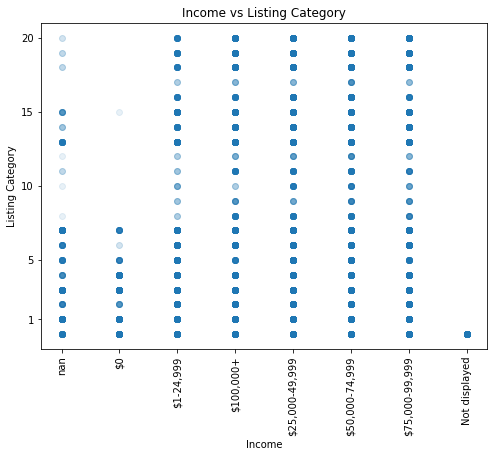

In [68]:
#income range vs listing category

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'IncomeRange', y = 'ListingCategory_(numeric)',alpha = 1/10)
#plt.xlim([0, 25000])
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.yticks([1, 5, 10,15,20], ['1', '5', '10','15','20'])
plt.ylabel('Listing Category')
plt.title('Income vs Listing Category');
plt.show()


>Looking at the increase in darkness as you move from left to right indicates potentially a more voluntary expense. I notice that trend with #12 green loans. I expected the trend for #5-School use would have gone from dark with the lower incomes to light with the higher incomes. My thought on this is that as people finish school, they earn higher incomes and finish taking classes. That doesn't appear to be happening here.  

>Just for the information again:
>The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

>Let me try to see one more visual, a heatmap, on the above comparison to see if it is any clearer. 

In [50]:
ct_counts = df.groupby(['IncomeRange', 'ListingCategory_(numeric)']).size()


In [51]:
ct_counts = ct_counts.reset_index(name='count')


In [52]:
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'ListingCategory_(numeric)', values = 'count')

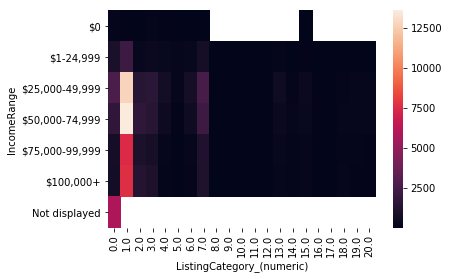

In [53]:
sb.heatmap(ct_counts)

>This is even less clear than the scatterplot due to the smaller number of loans in most categories compared to those in column 1. The scale needs to be up to 13,000 but many of these categories have less than that. So maybe the scatterplot was a better illustration. It shows at least that those with incomes $100,000 took part in higher concentrations of all of the categories. I was most interested in the adoption category=8.

>Back to looking at variables compared to Interest Rate. Let's look at Loan Status.

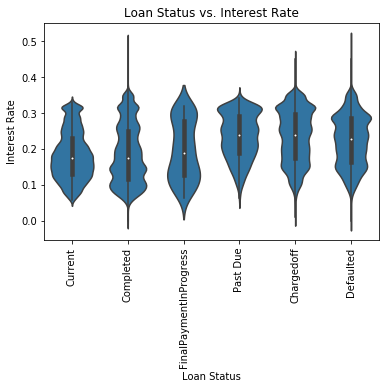

In [69]:
#Loan status vs rate
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='LoanStatus_new', y='BorrowerRate',color=base_color);

plt.xticks(rotation=90);
plt.xlabel('Loan Status')
plt.title('Loan Status vs. Interest Rate');

plt.ylabel('Interest Rate');

>I am new to violin plots but I really like the way this one shows that those that are current and completed on their status tend/tended to have lower interest rates. Those that are past due or defaulted have much of their data toward the top if their "violin"
>I didn't expect the final payment in progress category to have two places that expanded out. 


>When thinking about the loan status and the interest rate, I was thinking that the interest rate may be the independent variable here. So here is another way to look at that data: 
>I also was curious to see the original data categories, not my modified ones. 

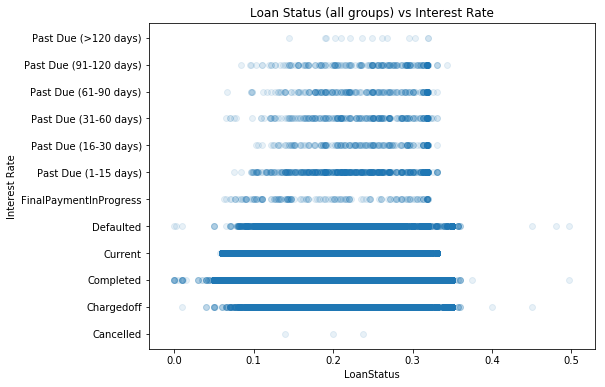

In [70]:
#Loan Status (all groups) vs. Interest Rate
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'BorrowerRate', y = 'LoanStatus',alpha = 1/10)
#plt.xlim([0, 25000])
plt.xlabel('LoanStatus')
plt.title('Loan Status (all groups) vs Interest Rate')

plt.ylabel('Interest Rate')
plt.show()

>I am curious to see a bit more detail of what is going on in those solid bars at the lower part of this graph
>I'm going to use a boxplot. 

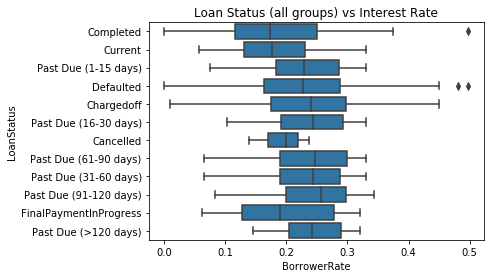

In [71]:
#Boxplot of Loan status 
sb.boxplot(data = df, x = 'BorrowerRate', y = 'LoanStatus',color = base_color)
plt.title('Loan Status (all groups) vs Interest Rate');

>If I want to use this data somewhere else, I will want to order the list on the left, but for now I'm going to leave it as this was just curiosity.

>Here is the same process as above with my modified categories, the scatter and the boxplot

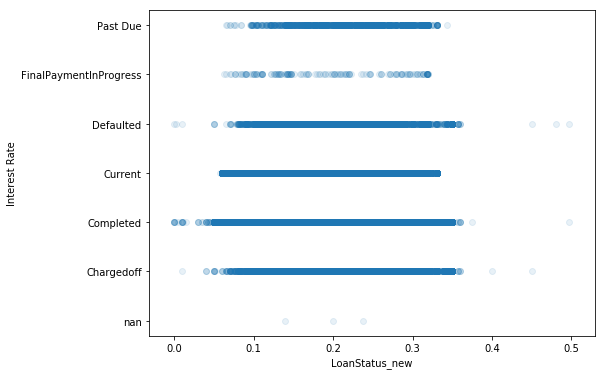

In [63]:
#Boxplot of Loan status with modified loanstatus column

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'BorrowerRate', y = 'LoanStatus_new',alpha = 1/10)
#plt.xlim([0, 25000])
plt.xlabel('LoanStatus_new')

plt.ylabel('Interest Rate')
plt.show()

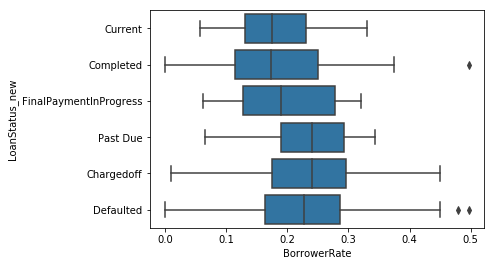

In [65]:
 #boxplot of modified categories of Loan Status
sb.boxplot(data = df, x = 'BorrowerRate', y = 'LoanStatus_new',color = base_color)

>This is nicer to see the trend since the left hand side is ordered from the better statuses at the top and the least desireable at the bottom.
>The trend is that the median values tend toward the higher interest rates. The lower the interest rate, the more likely someone is to have paid the loan off. 

>Now we will look at Income Range vs. Interest Rate using violin plots.

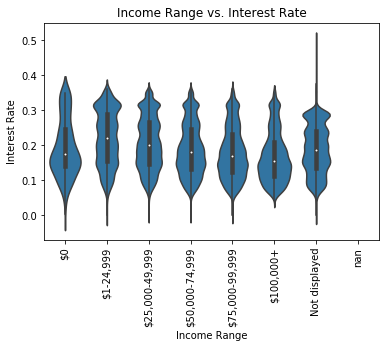

In [67]:
#Income Range vs rate
sb.violinplot(data=df, x='IncomeRange', y='BorrowerRate',color=base_color);

plt.xticks(rotation=90);
plt.xlabel('Income Range')

plt.ylabel('Interest Rate')
plt.title('Income Range vs. Interest Rate');

>This is clearly making an illustration that the higher the income, the lower the interest rates tend to be.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are relationships between much of the data I'm looking at as possible influeners on the interest rate. I see a relationship with Credit Score, Original Loan Amount, and Income Range and with all three, the higher the value is of those three variables, the lower the Interest rate is for the borrower. 

>The Loan Status show a relationship between those that are current or paid off having lower interest rate. 

>The Listing category variable is interesting to me since there are certainly categories that are more voluntary than others and lend themselves to a higher income group. Also some of my expectations, like adoption having a higher interest rate, didn't really prove itself in the date. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There appears to be a relationship that I didn't think about which is between the Credit Score and the amount of the loan given. 

## Multivariate Exploration

> I want to explore the relationship between the interest rate, category listing, and income range. I also want to... 

ValueError: c of shape (200,) not acceptable as a color sequence for x with size 200, y with size 200

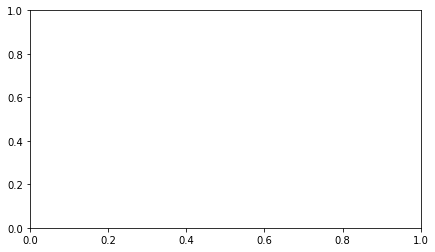

In [90]:

np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]


# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = df_subset, x = 'ListingCategory_(numeric)', y = 'BorrowerRate', c = 'IncomeRange',
            cmap = 'viridis_r')
plt.title('Interest Rate and Income Range by Listing Category')
plt.xlabel('Listing Category')
plt.ylabel('Interest Rate')
plt.colorbar(label = 'Income Range');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

